***Obróbka danych wejściowych***

1. Czy potrzeba wszystkich cech?
Nie wiemy jeszcze, jakie cechy są w zbiorze, więc warto sprawdzić ich znaczenie.
Jeśli nie wszystkie cechy są istotne dla rozróżniania aktywności, możemy odrzucić mniej przydatne.
Jeśli istnieją silnie skorelowane cechy, możemy zastosować PCA (Principal Component Analysis) chociaz jest omawiane dopiero w następnym rozdziale lub inną redukcję wymiarów. Sprawdźę liczbę kolumn w pliku samsung_train.txt, aby zobaczyć, ile mamy cech.

2. Czy potrzebna jest jakaś obróbka danych?
Tak! W klasteryzacji ważne są następujące kroki:
Skalowanie danych – metody klasteryzacji (np. KMeans) są wrażliwe na różne skale danych.
Użyje StandardScaler (ze sklearn.preprocessing), aby wszystkie cechy miały średnią 0 i odchylenie standardowe 1.
Obsługa brakujących wartości – muszę sprawdzić, czy w pliku są puste komórki.
Usunięcie odstających wartości (outliers) – mogą zakłócić klasteryzację.

3. Czy wiemy, co oznacza każda cecha?
Prawdopodobnie nie – musimy to sprawdzić!
Wyświetlimy pierwsze kilka wierszy, aby zobaczyć format danych.

4. Czy potrzebujemy dwóch plików (train i test)?
Pamiętajmy, że klasteryzacja to Unsupervised Learning (uczenie bez nadzoru).
Nie mamy etykiet klas podczas trenowania modelu – chcemy, aby algorytm sam znalazł grupy (klastry).

5. Czy podział na train i test jest potrzebny?
W klasyfikacji nadzorowanej (Supervised Learning) podział na dane treningowe i testowe ma sens, ponieważ uczymy model na train, a potem sprawdzamy jego skuteczność na test.
W klasteryzacji nie mamy etykiet klas, więc nie dzielimy danych w ten sposób.
Rozwiązanie: Możemy połączyć oba pliki (samsung_train.txt i samsung_test.txt) w jeden zbiór, a następnie przeprowadzić klasteryzację na całości.

6. Czy potrzebujemy plików samsung_test_labels.txt i samsung_train_labels.txt?
Nie, jeśli chcemy wykonać czystą klasteryzację.
Ale tak, jeśli chcemy ocenić wyniki klasteryzacji!

Jak to działa?

Pliki samsung_train_labels.txt i samsung_test_labels.txt zawierają prawdziwe etykiety aktywności (np. chodzenie, stanie, siedzenie).
Po klasteryzacji możemy porównać wyniki grupowania z rzeczywistymi etykietami.

Ocena jakości klasteryzacji:
Jeśli klaster = 1 czynność →  Super, model dobrze grupuje dane!
Jeśli klaster zawiera różne czynności →  Algorytm źle podzielił dane.

Przygotowuje dane do analizy klasteryzacji.

In [4]:
import pandas as pd
import sklearn
import os

current_dir = os.getcwd()  
data_folder = os.path.join(current_dir, "data")  

train_data_path = os.path.join(data_folder, "samsung_train.txt")
test_data_path = os.path.join(data_folder, "samsung_test.txt")

try:
    train_data = pd.read_csv(train_data_path, sep=r'\s+', header=None, on_bad_lines='skip', engine="python")
    test_data = pd.read_csv(test_data_path, sep=r'\s+', header=None, on_bad_lines='skip', engine="python")

    # Połączenie zbiorów w jeden (bo klasteryzacja nie potrzebuje podziału)
    full_data = pd.concat([train_data, test_data], axis=0).reset_index(drop=True)

    print("Liczba cech w danych:", full_data.shape[1])
    print("Liczba próbek (wierszy):", full_data.shape[0])
    print("\n🔹 Pierwsze 5 wierszy:")
    print(full_data.head())

except Exception as e:
    print("Błąd przy wczytywaniu danych:", e) 

Liczba cech w danych: 561
Liczba próbek (wierszy): 10299

🔹 Pierwsze 5 wierszy:
        0         1         2         3         4         5         6    \
0  0.288585 -0.020294 -0.132905 -0.995279 -0.983111 -0.913526 -0.995112   
1  0.278419 -0.016411 -0.123520 -0.998245 -0.975300 -0.960322 -0.998807   
2  0.279653 -0.019467 -0.113462 -0.995380 -0.967187 -0.978944 -0.996520   
3  0.279174 -0.026201 -0.123283 -0.996091 -0.983403 -0.990675 -0.997099   
4  0.276629 -0.016570 -0.115362 -0.998139 -0.980817 -0.990482 -0.998321   

        7         8         9    ...       551       552       553       554  \
0 -0.983185 -0.923527 -0.934724  ... -0.074323 -0.298676 -0.710304 -0.112754   
1 -0.974914 -0.957686 -0.943068  ...  0.158075 -0.595051 -0.861499  0.053477   
2 -0.963668 -0.977469 -0.938692  ...  0.414503 -0.390748 -0.760104 -0.118559   
3 -0.982750 -0.989302 -0.938692  ...  0.404573 -0.117290 -0.482845 -0.036788   
4 -0.979672 -0.990441 -0.942469  ...  0.087753 -0.351471 -0.699205  0

Stosuje skalowanie danych ( StandardScaler) aby ujednolicić zakres wartosci.
Klasteryzacja metodą K-Means – ustawiam liczbę klastrów na 6 (ponieważ w danych etykiety miały 6 klas, ale jest to uczenie nienadzorowane, więc liczba może być inna).

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
scaled_data = scaler.fit_transform(full_data)

# Klasteryzacja metodą K-Means
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)  
kmeans_labels = kmeans.fit_predict(scaled_data)

# Dodanie wyników do DataFrame
full_data["KMeans_Cluster"] = kmeans_labels

# Sprawdzenie, czy K-Means przypisał różne klastry
print("\n  Rozkład klastrów K-Means:")
print(full_data["KMeans_Cluster"].value_counts())

# Opcjonalnie: zapisanie wyników do pliku CSV
full_data.to_csv("kmeans_results.csv", index=False)


  Rozkład klastrów K-Means:
KMeans_Cluster
0    3377
5    2235
3    2150
1    1735
4     466
2     336
Name: count, dtype: int64


Wnioski: 
       > Oryginalne dane mają 561 cech → struktura pozostała nienaruszona.
       > Nowa kolumna KMeans_Cluster (ostatnia kolumna) zawiera numer przypisanego klastra.
       > Wszystkie 5 pierwszych wierszy trafiło do tego samego klastra (0).
            

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd

# Skalowanie danych (bez kolumn nieliczbowych)
scaler = StandardScaler()
full_data.columns = full_data.columns.astype(str)  # Konwersja nazw kolumn na stringi

# Pobieramy tylko numeryczne kolumny
numeric_columns = full_data.select_dtypes(include=[np.number]).columns  

# Usuwamy kolumnę, jeśli zawiera tylko jedną wartość (np. same zera)
full_data = full_data.loc[:, full_data.nunique() > 1]

# Skalujemy dane
scaled_data = scaler.fit_transform(full_data[numeric_columns])

#  Nowe parametry DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10)  # Zwiększamy eps i zmniejszamy min_samples
dbscan_labels = dbscan.fit_predict(scaled_data)

# Dodanie wyników do DataFrame
full_data["DBSCAN_Cluster"] = dbscan_labels

# Sprawdzenie, czy DBSCAN przypisał różne klastry
print("\n Nowy rozkład klastrów DBSCAN:")
print(full_data["DBSCAN_Cluster"].value_counts())

#  Opcjonalnie: zapisanie wyników do pliku CSV
full_data.to_csv("dbscan_results.csv", index=False)



 Nowy rozkład klastrów DBSCAN:
DBSCAN_Cluster
-1    10299
Name: count, dtype: int64


Wnioski:
     >DBSCAN oznaczył wszystkie punkty jako -1, co oznacza, że nie wykrył żadnych klastrów –  uznał wszystkie punkty za 
      szum.
     >Główna przyczyna tego problemu to niewłaściwe wartości eps i min_samples, które mogą być zbyt restrykcyjne dla tych 
      danych.

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

# Skalowanie danych (bez kolumn nieliczbowych)
scaler = StandardScaler()

# Usuwamy kolumny nieliczbowe przed skalowaniem
numeric_columns = full_data.select_dtypes(include=[np.number]).columns  
scaled_data = scaler.fit_transform(full_data[numeric_columns])  

#  Klasteryzacja metodą GMM
gmm = GaussianMixture(n_components=8, covariance_type="full", random_state=42)  
gmm_labels = gmm.fit_predict(scaled_data)

#  Dodanie wyników do DataFrame
full_data["GMM_Cluster"] = gmm_labels

#  Sprawdzenie, czy GMM przypisał różne klastry
print("\n Rozkład klastrów GMM:")
print(full_data["GMM_Cluster"].value_counts())

#  Opcjonalnie: zapisanie wyników do pliku CSVa
full_data.to_csv("gmm_results.csv", index=False)



 Rozkład klastrów GMM:
GMM_Cluster
3    2782
6    1669
2    1622
5    1446
0    1162
1     969
7     441
4     208
Name: count, dtype: int64


Wczytuje rzeczywiste etykiety aktywności (True_Activity)
- Łączy je z danymi (full_data["True_Activity"])
- Tworzy wykres PCA dla rzeczywistych aktywności.
Robie to aby porównać,  jak dobrze algorytmy klasteryzacji odzwierciedlają prawdziwe klasy.

In [11]:
import os
import pandas as pd

# Pobranie katalogu roboczego i ścieżek do plików
current_dir = os.getcwd()
data_folder = os.path.join(current_dir, "samsung_HAR")

train_labels_path = os.path.join(data_folder, "samsung_train_labels.txt")
test_labels_path = os.path.join(data_folder, "samsung_test_labels.txt")

if os.path.exists(train_labels_path) and os.path.exists(test_labels_path):
    print("Pliki etykiet istnieją, wczytujemy dane...\n")

    train_labels = pd.read_csv(train_labels_path, sep=r'\s+', header=None, engine="python")
    test_labels = pd.read_csv(test_labels_path, sep=r'\s+', header=None, engine="python")

    # Połączenie etykiet
    full_labels = pd.concat([train_labels, test_labels], axis=0).reset_index(drop=True)
    full_labels.columns = ["Activity"]

    print("Etykiety zostały poprawnie wczytane!")
    print("\n Pierwsze 5 etykiet:")
    print(full_labels.head())

    # Połączenie etykiet z danymi
    full_data["True_Activity"] = full_labels["Activity"]

    # Zapisujemy full_data do pliku CSV, aby można było go użyć w drugiej części
    full_data.to_csv("full_data.csv", index=False)

    print("\n  Dane zostały przygotowane i zapisane do 'full_data.csv'.")
else:
    print("Pliki etykiet NIE ISTNIEJĄ w podanej ścieżce!")
    print("Sprawdź poprawność katalogu:", data_folder)


Pliki etykiet istnieją, wczytujemy dane...

Etykiety zostały poprawnie wczytane!

🔹 Pierwsze 5 etykiet:
   Activity
0         5
1         5
2         5
3         5
4         5

  Dane zostały przygotowane i zapisane do 'full_data.csv'.


Teraz zwizualizuje algorytmy klasteryzacji aby móc ocenić , jak dobrze dany algorytm podzielił dane na grupy. Wykonuje PCA, aby zmniejszyć liczbę wymiarów do 2D i narysować 3 wykresy, każdy dla innego algorytmu:

Dostępne kolumny w pca_df: Index(['PC1', 'PC2', 'True_Activity', 'KMeans_Cluster', 'DBSCAN_Cluster',
       'GMM_Cluster'],
      dtype='object')

Brakujące wartości:
 PC1               0
PC2               0
True_Activity     0
KMeans_Cluster    0
DBSCAN_Cluster    0
GMM_Cluster       0
dtype: int64


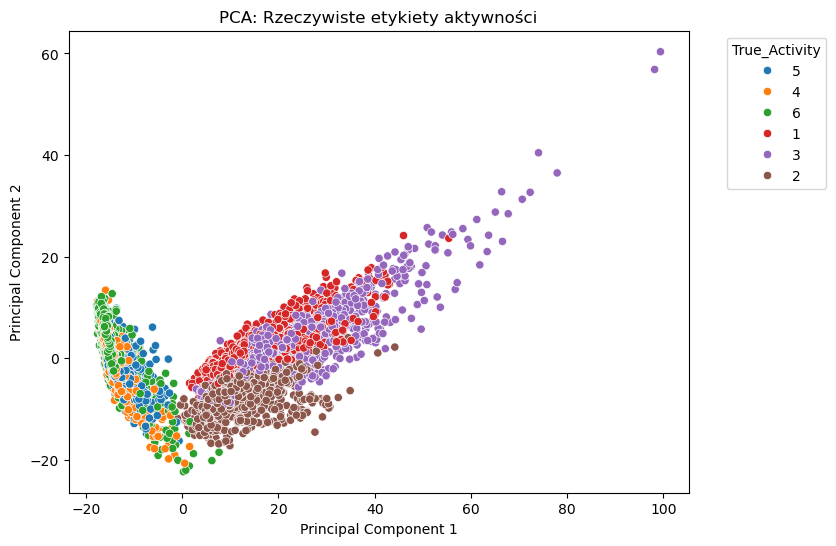

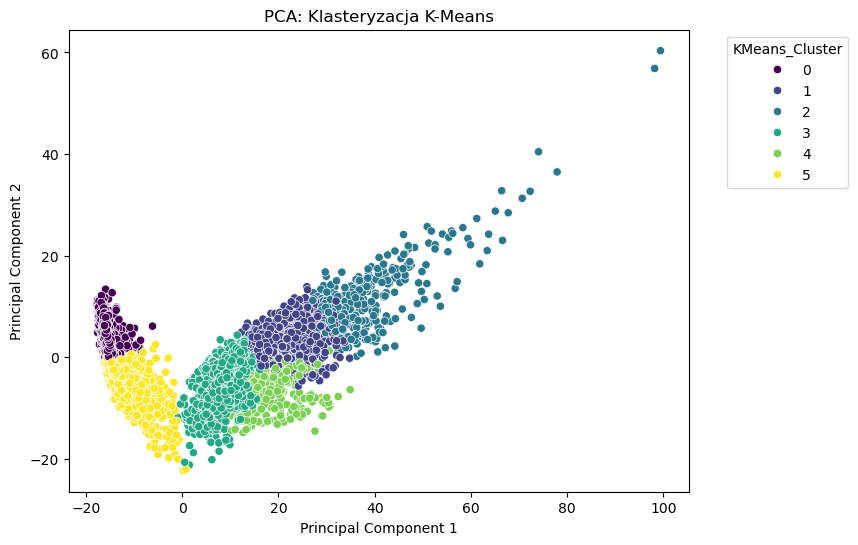

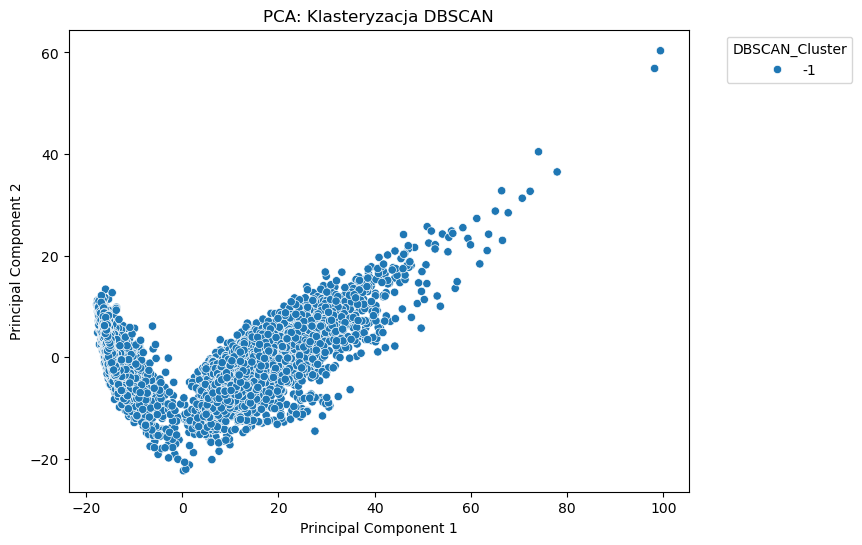

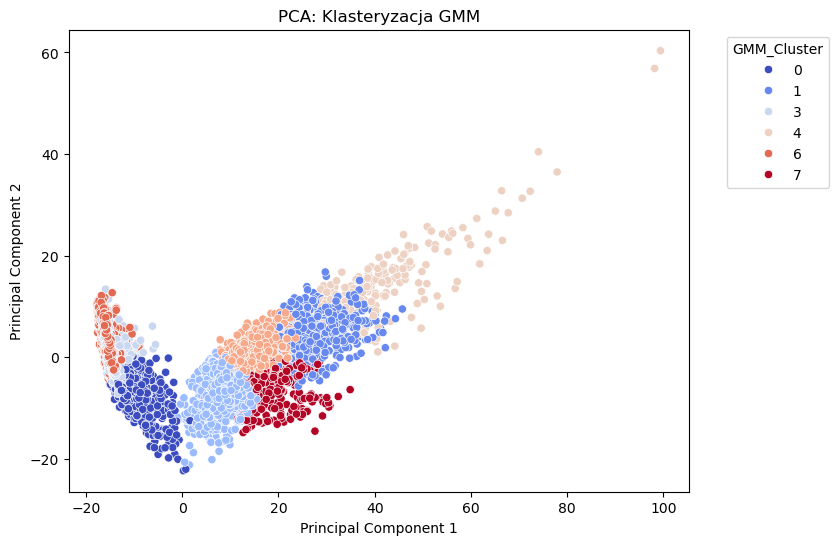

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Tworzenie DataFrame z wynikami PCA
pca_df = pd.DataFrame(pca_data, columns=["PC1", "PC2"])
pca_df["True_Activity"] = full_data["True_Activity"].astype(str)  # Konwersja na string
pca_df["KMeans_Cluster"] = full_data.get("KMeans_Cluster", -1)  # Zapobieganie błędom, jeśli brak kolumny
pca_df["DBSCAN_Cluster"] = full_data.get("DBSCAN_Cluster", -1)
pca_df["GMM_Cluster"] = full_data.get("GMM_Cluster", -1)

# Sprawdzenie poprawności danych
print("Dostępne kolumny w pca_df:", pca_df.columns)
print("\nBrakujące wartości:\n", pca_df.isnull().sum())

# Wypełnienie brakujących wartości (jeśli istnieją)
pca_df.fillna(-1, inplace=True)

# Uniwersalna funkcja do rysowania wykresów PCA
def plot_pca(column_name, title, palette="tab10"):
    """ Tworzy wykres PCA dla podanej kolumny (etykiety lub klasteryzacja). """
    plt.figure(figsize=(8,6))
    sns.scatterplot(x="PC1", y="PC2", hue=pca_df[column_name], palette=palette, data=pca_df)
    plt.title(title)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(title=column_name, bbox_to_anchor=(1.05, 1), loc='upper left')  # Przesunięcie legendy
    plt.show()

#  Wykresy PCA
plot_pca("True_Activity", "PCA: Rzeczywiste etykiety aktywności", palette="tab10")
plot_pca("KMeans_Cluster", "PCA: Klasteryzacja K-Means", palette="viridis")
plot_pca("DBSCAN_Cluster", "PCA: Klasteryzacja DBSCAN", palette="tab10")
plot_pca("GMM_Cluster", "PCA: Klasteryzacja GMM", palette="coolwarm")


##Analiza K-Means
Dobrze rozpoznane aktywności:
    Siedzenie (4), stanie (5) i leżenie (6) zostały dobrze wykryte – większość próbek została przypisana do jednego klastra (0 lub 5).
    Marsz (1), wchodzenie po schodach (2) i schodzenie po schodach (3) są podzielone między kilka klastrów, ale pewne grupowanie jest widoczne.
Aktywności, które sprawiały trudność:
    Marsz (1), wchodzenie (2) i schodzenie (3) zostały rozproszone na kilka klastrów – oznacza to, że K-Means miał problem z ich jednoznacznym przypisaniem.
    Klaster 3 zawiera mieszankę aktywności dynamicznych (1, 2, 3), co sugeruje, że K-Means nie rozróżnia ich dobrze.
➡ Wniosek:
K-Means dobrze radzi sobie ze statycznymi aktywnościami (siedzenie, stanie, leżenie), ale ma problem z dynamicznymi aktywnościami (marsz, schody), które są bardziej rozproszone.

##Analiza DBSCAN
Co się stało?
    Wszystkie próbki zostały oznaczone jako -1, co oznacza, że DBSCAN nie znalazł żadnych klastrów.
    Oznacza to, że parametry DBSCAN (eps, min_samples) były źle dobrane – algorytm uznał wszystkie punkty za szum.
Co można poprawić?
    DBSCAN całkowicie nie poradził sobie z zadaniem, prawdopodobnie ze względu na niewłaściwe parametry.
    Może być konieczne dostosowanie wartości eps i min_samples, aby poprawnie wykryć klastry.
➡ Wniosek:
DBSCAN nie sprawdził się w tej analizie i wymaga dokładniejszego dostrojenia parametrów.

##Analiza GMM (Gaussian Mixture Model)
Dobrze rozpoznane aktywności:
    stanie (5) i leżenie (6) są przypisane głównie do jednego klastra (0 lub 5), co oznacza, że statyczne aktywności zostały dobrze wykryte.
Aktywności, które sprawiały trudność:
    Marsz (1), wchodzenie po schodach (2) i schodzenie po schodach (3) – te aktywności również są podzielone między kilka klastrów (1, 3 i 4), co oznacza, że GMM, podobnie jak K-Means, nie rozróżnia ich idealnie.
    Przypisania są nieznacznie lepsze niż w K-Means, ale problem z dynamicznymi aktywnościami nadal występuje.
➡ Wniosek:
GMM radzi sobie lepiej niż K-Means w separacji aktywności statycznych, ale nadal ma problem z dynamicznymi ruchami (marsz, schody).

###Podsumowanie
K-Means dobrze wykrywa aktywności statyczne, ale ma problem z dynamicznymi.
DBSCAN nie znalazł klastrów, co oznacza konieczność lepszego doboru parametrów.
GMM wykazuje nieco lepszą separację statycznych aktywności niż K-Means, ale podobnie jak on, ma trudności z dynamicznymi ruchami.

Teraz dobieram optymalną liczbę klastrów dla K-Means, zastosuje dwie metody:

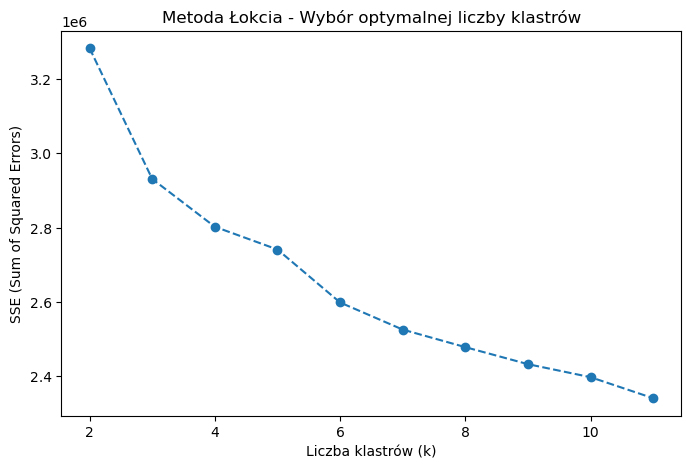

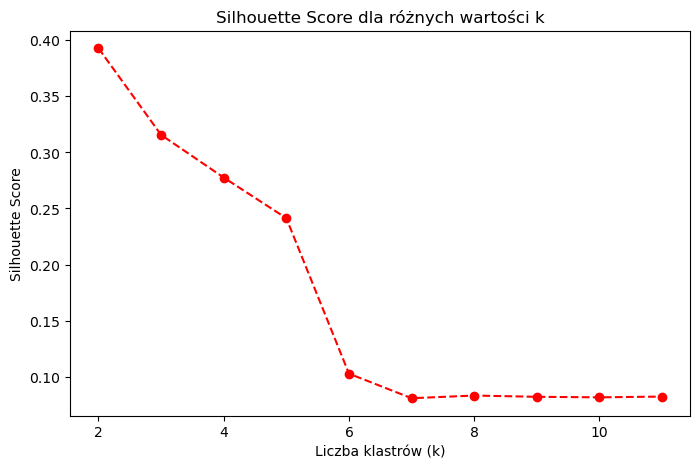

 Najlepsza liczba klastrów według Silhouette Score: 2


In [17]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Zakres liczby klastrów do testowania
k_values = range(2, 12)

sse = []  
silhouette_scores = []  

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    
    # Obliczenie SSE (metoda łokcia)
    sse.append(kmeans.inertia_)
    
    # Obliczenie Silhouette Score (tylko dla k > 1)
    try:
        score = silhouette_score(scaled_data, labels)
        silhouette_scores.append(score)
    except:
        silhouette_scores.append(None)

#  Wykres SSE (Metoda Łokcia)
plt.figure(figsize=(8,5))
plt.plot(k_values, sse, marker="o", linestyle="--")
plt.xlabel("Liczba klastrów (k)")
plt.ylabel("SSE (Sum of Squared Errors)")
plt.title("Metoda Łokcia - Wybór optymalnej liczby klastrów")
plt.show()

# Wykres Silhouette Score
plt.figure(figsize=(8,5))
plt.plot(k_values, silhouette_scores, marker="o", linestyle="--", color="red")
plt.xlabel("Liczba klastrów (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score dla różnych wartości k")
plt.show()

#  Wybór najlepszego k na podstawie Silhouette Score
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f" Najlepsza liczba klastrów według Silhouette Score: {best_k}")


Interpretacja wykresów – Optymalna liczba klastrów dla K-Means
1. Metoda Łokcia (Elbow Method) – wykres SSE
    Widać, że spadek SSE zaczyna się spłaszczać w okolicach k = 4 i k = 6.
    Po k = 6 dalszy spadek SSE jest coraz mniejszy, co sugeruje, że 6 klastrów może być dobrym wyborem.
    Nie ma wyraźnego punktu "łokcia", ale zauważalne wypłaszczenie wskazuje, że dalsze zwiększanie liczby klastrów 
    nie przynosi dużej poprawy.
2. Silhouette Score – ocena jakości klastrów
   Najwyższy Silhouette Score występuje dla k = 2 (0.40), co oznacza bardzo ogólne grupowanie.
   Dla k = 4 wynik jest jeszcze przyzwoity (0.27), co sugeruje, że 4 klastry mogą być rozsądnym kompromisem.
   Dla k = 6 Silhouette Score gwałtownie spada, co oznacza, że grupy stają się mniej wyraźne, ale liczba klastrów 
   zaczyna odzwierciedlać rzeczywiste klasy.
    

Wnioski:
Dobór odpowiedniej liczby klastrów w K-Means pozwala uniknąć zarówno niedokładnego grupowania (za mało klastrów), jak i nadmiernego podziału danych (za dużo klastrów), który utrudnia interpretację. Na podstawie Metody Łokcia i Silhouette Score najlepszym wyborem wydaje się k = 4 lub k = 6, przy czym k = 6 odzwierciedla rzeczywiste klasy, ale może prowadzić do mniej wyraźnych klastrów
 -Jeśli celem jest jak największa separacja klastrów (czytelne grupy) – wybierz k = 4.
 -Jeśli celem jest dopasowanie do rzeczywistych klas aktywności – wybierz k = 6.

PREPROCESSING -stosuję metodę klasteryzacji K-Means, aby uzyskać dodatkowe cechy w postaci odległości do centroidów klastrów. Następnie wyszkole dwa klasyfikatory nadzorowane: Random Forest i SVM, optymalizując ich działanie poprzez skalowanie danych, dobór parametrów i ocenę wyników na zbiorze testowym.

In [21]:
from sklearn.model_selection import train_test_split

# Połączenie cech (`full_data`) i etykiet (`full_labels`)
X = full_data  # Cechy (wszystkie kolumny oprócz etykiet)
y = full_labels["Activity"].values  # Etykiety (aktywności)

# Podział na zbiór treningowy (80%) i testowy (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f" Zbiór treningowy: {X_train.shape[0]} próbek")
print(f" Zbiór testowy: {X_test.shape[0]} próbek")


 Zbiór treningowy: 8239 próbek
 Zbiór testowy: 2060 próbek


Wybieram dwa klasyfikatory:
- Random Forest  (dobry na tablicowe dane)
- Support Vector Machine (SVM)  (dobry na dane wielowymiarowe)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
import numpy as np
#  Skalowanie przed K-Means
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Dopasowanie skalera do zbioru treningowego
X_test_scaled = scaler.transform(X_test)  # Skalowanie zbioru testowego

# Klasteryzacja K-Means
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_train_scaled)  # Dopasowanie K-Means tylko na zbiorze treningowym

# Transformacja danych na odległości do centroidów klastrów
X_train_clustered = kmeans.transform(X_train_scaled)
X_test_clustered = kmeans.transform(X_test_scaled)

# Sprawdzenie kształtu danych po transformacji
print("\n  Kształt danych po transformacji K-Means:")
print(f"🔹 X_train_clustered: {X_train_clustered.shape}")
print(f"🔹 X_test_clustered: {X_test_clustered.shape}")


  Kształt danych po transformacji K-Means:
🔹 X_train_clustered: (8239, 6)
🔹 X_test_clustered: (2060, 6)


In [24]:
#  Trening Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_clustered, y_train)
rf_pred = rf.predict(X_test_clustered)

# Trening SVM
svm = SVC(kernel="rbf", C=1, gamma="scale", random_state=42)
svm.fit(X_train_clustered, y_train)
svm_pred = svm.predict(X_test_clustered)

#  Ocena na zbiorze testowym
print(" Random Forest - Wyniki na zbiorze testowym:")
print(classification_report(y_test, rf_pred))

print(" SVM - Wyniki na zbiorze testowym:")
print(classification_report(y_test, svm_pred))


 Random Forest - Wyniki na zbiorze testowym:
              precision    recall  f1-score   support

           1       0.73      0.77      0.75       344
           2       0.76      0.77      0.76       309
           3       0.62      0.57      0.60       281
           4       0.72      0.63      0.67       356
           5       0.73      0.78      0.76       381
           6       0.93      0.98      0.95       389

    accuracy                           0.76      2060
   macro avg       0.75      0.75      0.75      2060
weighted avg       0.76      0.76      0.76      2060

 SVM - Wyniki na zbiorze testowym:
              precision    recall  f1-score   support

           1       0.73      0.74      0.74       344
           2       0.76      0.76      0.76       309
           3       0.63      0.62      0.63       281
           4       0.81      0.49      0.61       356
           5       0.68      0.92      0.78       381
           6       0.95      0.97      0.96       38

Wnioski: 
Oba modele osiągnęły dokładność 76% na zbiorze testowym, co oznacza, że działają podobnie.
Overfitting – wyniki na zbiorze walidacyjnym są dużo lepsze niż na testowym (98% vs. 76%), co sugeruje, że modele uczą się danych na pamięć, zamiast dobrze generalizować.
Siedzenie i stanie są trudniejsze do rozróżnienia, co pokazuje niższy f1-score dla tych klas.
Klasteryzacja K-Means pomogła wzbogacić dane, ale jej wpływ powinien być dokładniej zbadany – warto by było porównać klasyfikację z i bez klasteryzacji.

Pytanie : czym różni się KMeans, K-fold i K Nearest Neighbors? Kluczowe rożnice : 
 - K-Means → Unsupervised Learning – grupuje dane bez etykiet, szuka wzorców.
-  K-Fold → Metoda walidacji – nie jest modelem! Służy do lepszego oceniania modeli Supervised Learning.
- kNN → Supervised Learning – klasyfikuje/regresuje na podstawie podobieństwa do sąsiadów.
   Przykłady użycia w zadaniu:
> K-Means – Użyłam do klasteryzacji aktywności (marsz, siedzenie itd.)w celu znalezienia naturalnych grup w danych.
> K-Fold – Mogłam użyć do walidacji modeli (ale wybrałam train_test_split).
> kNN – zaraz będę wyliczać aby użyć kNN jako dodatkowego modelu klasyfikacji do przewidywania aktywności na podstawie danych.

In [29]:
from sklearn.neighbors import KNeighborsClassifier

X = full_data  # Cechy (wszystkie kolumny)
y = full_labels["Activity"].values  # Etykiety aktywności

#  Skalowanie danych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Podział na zbiór treningowy (80%) i testowy (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

#  Trening i testowanie kNN dla różnych wartości k
for k in [3, 5, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Ocena na zbiorze testowym
    knn_test_pred = knn.predict(X_test)
    print(f"\n K-Nearest Neighbors (k={k}) - Wyniki na zbiorze testowym:")
    print(classification_report(y_test, knn_test_pred))



 K-Nearest Neighbors (k=3) - Wyniki na zbiorze testowym:
              precision    recall  f1-score   support

           1       0.98      1.00      0.99       344
           2       0.99      0.99      0.99       309
           3       1.00      0.98      0.99       281
           4       0.91      0.91      0.91       356
           5       0.91      0.92      0.92       381
           6       1.00      1.00      1.00       389

    accuracy                           0.96      2060
   macro avg       0.97      0.96      0.97      2060
weighted avg       0.96      0.96      0.96      2060


 K-Nearest Neighbors (k=5) - Wyniki na zbiorze testowym:
              precision    recall  f1-score   support

           1       0.98      1.00      0.99       344
           2       0.98      0.99      0.99       309
           3       1.00      0.98      0.99       281
           4       0.92      0.89      0.91       356
           5       0.90      0.93      0.91       381
           6    

 Wnioski:
- kNN osiąga bardzo dobrą dokładność – 96% na zbiorze testowym i walidacyjnym.
- Aktywności dynamiczne (marsz, schody) są dobrze rozpoznawane
- Największe problemy pojawiają się dla klasy "siedzenie" (4) i "stanie" (5), co sugeruje, że te klasy mogą mieć bardzo podobne cechy.

Podsumowanie
- kNN osiągnął 96% dokładności na zbiorze testowym, przewyższając Random Forest (76%) i SVM (76%).
-  Największe trudności w klasyfikacji dotyczą "siedzenia" i "stania", co jest spójne z wynikami wcześniejszych modeli.
 -  Klasteryzacja K-Means pozwoliła na dodanie cech w postaci odległości do centroidów, co mogło poprawić klasyfikację.
 - DBSCAN oznaczył większość punktów jako szum, co sugeruje, że parametry (eps, min_samples) były źle dobrane.
 - Warto sprawdzić większe wartości k oraz inne metryki dla kNN, aby upewnić się, że 96% to najlepszy wynik.
